In [ ]:
pip install pymannkendall


In [8]:
pip install pandas openpyxl pymannkendall


In [14]:
import pandas as pd
import pymannkendall as mk


file_path = "Pali (1).xlsx"
df = pd.read_excel(file_path)


months = df.columns[1:]


results = {}


for month in months:
    data = df[month].dropna().tolist()
    test_result = mk.original_test(data)


    results[month] = {
        "Z-Value": test_result.z,
        "Trend": test_result.trend,
        "p-Value": test_result.p
    }


results_df = pd.DataFrame(results).T
print(results_df)


results_df.to_excel("Mann_Kendall_Results.xlsx")
print("Results saved to 'Mann_Kendall_Results.xlsx'")


        Z-Value     Trend   p-Value
Jan   -0.350758  no trend   0.72577
Feb    0.140147  no trend  0.888544
Mar      1.8425  no trend  0.065402
April   0.10666  no trend  0.915058
May    0.717564  no trend  0.473026
June   0.864968  no trend  0.387056
July   0.505437  no trend  0.613252
Aug    1.898437  no trend  0.057639
Sept   1.112851  no trend  0.265772
Oct    0.867382  no trend  0.385733
Nov   -0.477218  no trend  0.633207
Dec   -1.052311  no trend  0.292657
Results saved to 'Mann_Kendall_Results.xlsx'


In [15]:
pip install pandas openpyxl pymannkendall matplotlib seaborn


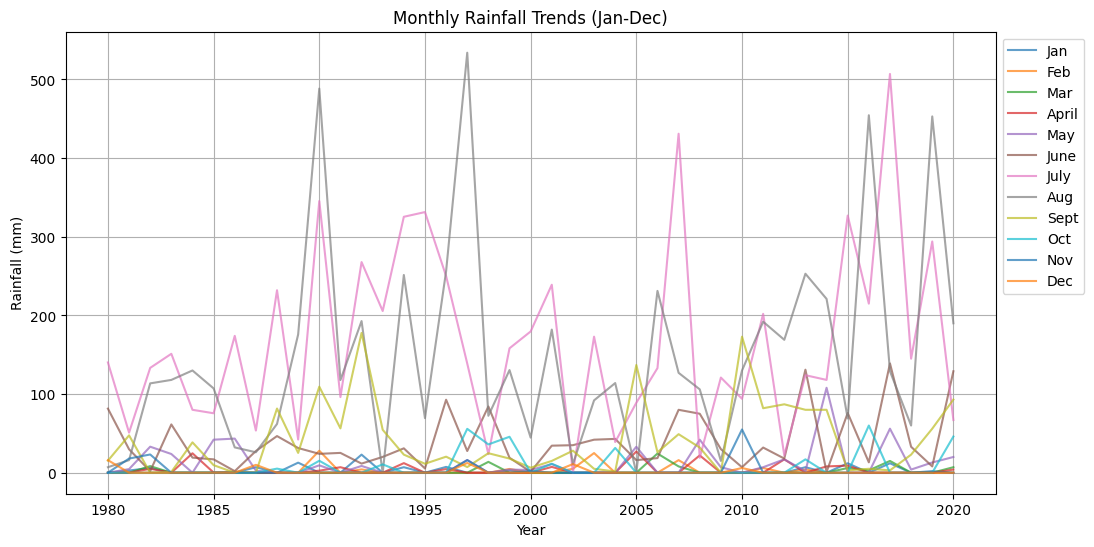

<ipython-input-16-a574f45b65c0>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=z_values_df.index, y=z_values_df['Z-Value'], palette="coolwarm")


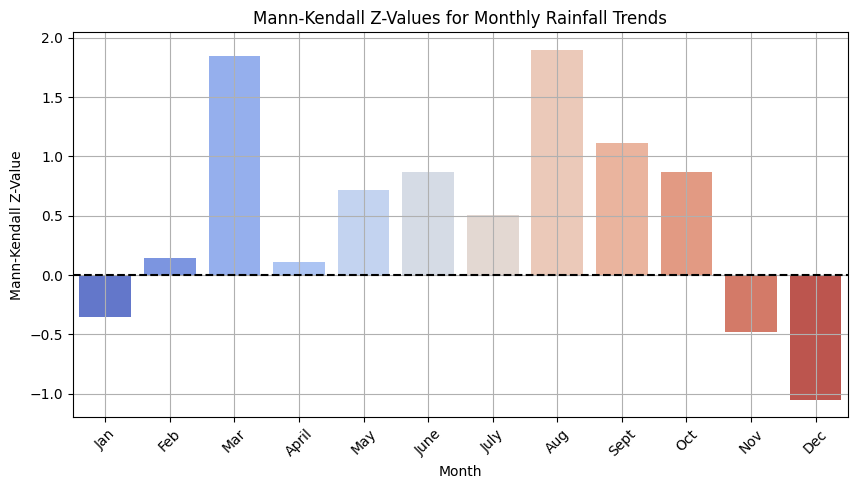

Z-Values saved to 'Mann_Kendall_Z_Values.xlsx'


In [16]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "Pali (1).xlsx"
df = pd.read_excel(file_path)


months = df.columns[1:]


mann_kendall_results = {}


for month in months:
    data = df[month].dropna().tolist()
    test_result = mk.original_test(data)
    mann_kendall_results[month] = test_result.z


z_values_df = pd.DataFrame.from_dict(mann_kendall_results, orient='index', columns=['Z-Value'])


plt.figure(figsize=(12, 6))
for month in months:
    plt.plot(df['Year'], df[month], label=month, alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Monthly Rainfall Trends (Jan-Dec)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(x=z_values_df.index, y=z_values_df['Z-Value'], palette="coolwarm")
plt.axhline(0, color='black', linestyle='--')  # Add a reference line at Z = 0
plt.xlabel('Month')
plt.ylabel('Mann-Kendall Z-Value')
plt.title('Mann-Kendall Z-Values for Monthly Rainfall Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


z_values_df.to_excel("Mann_Kendall_Z_Values.xlsx")
print("Z-Values saved to 'Mann_Kendall_Z_Values.xlsx'")


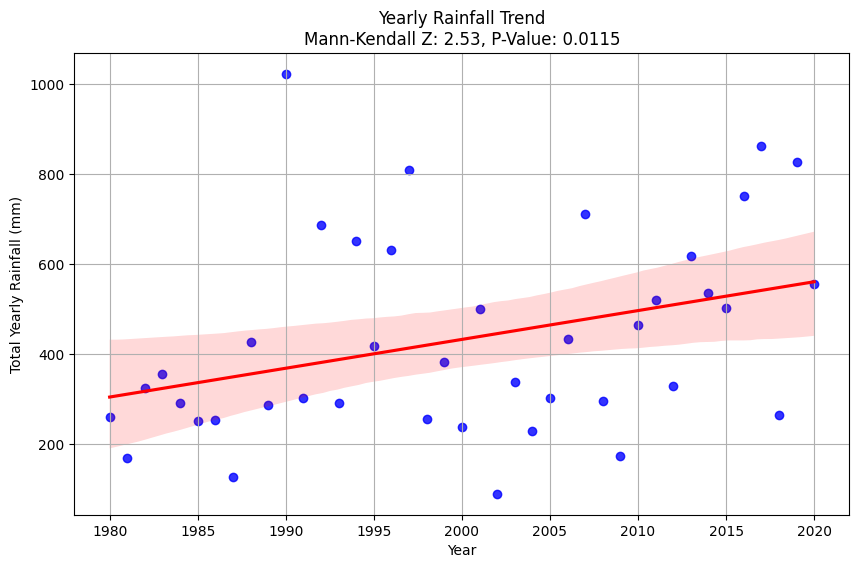

Yearly rainfall data saved to 'Yearly_Rainfall_Trend.xlsx'


In [17]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "Pali (1).xlsx"
df = pd.read_excel(file_path)


months = df.columns[1:]


df['Yearly_Rainfall'] = df[months].sum(axis=1)


test_result = mk.original_test(df['Yearly_Rainfall'])


z_value = test_result.z
p_value = test_result.p


plt.figure(figsize=(10, 6))
sns.regplot(x=df['Year'], y=df['Yearly_Rainfall'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Year")
plt.ylabel("Total Yearly Rainfall (mm)")
plt.title(f"Yearly Rainfall Trend\nMann-Kendall Z: {z_value:.2f}, P-Value: {p_value:.4f}")
plt.grid(True)
plt.show()

# Save results to an Excel file
df[['Year', 'Yearly_Rainfall']].to_excel("Yearly_Rainfall_Trend.xlsx", index=False)
print("Yearly rainfall data saved to 'Yearly_Rainfall_Trend.xlsx'")


In [20]:
print(df.columns)


Index(['Year', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'Winter'],
      dtype='object')


In [21]:
seasons = {
    "Winter": ["January", "February"],
    "Pre-Monsoon": ["March", "April", "May"],
    "Monsoon": ["June", "July", "August", "September"],
    "Post-Monsoon": ["October", "November", "December"]
}


Columns in Excel file: Index(['year', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug',
       'sept', 'oct', 'nov', 'dec'],
      dtype='object')
               Z-Value   P-Value     Trend
Winter       -0.161369  0.871803  no trend
Pre-Monsoon   1.348682  0.177439  no trend
Monsoon       1.898437  0.057639  no trend
Post-Monsoon -0.195925  0.844669  no trend
✅ Seasonal rainfall trends saved to 'Seasonal_Rainfall_Trend.xlsx'


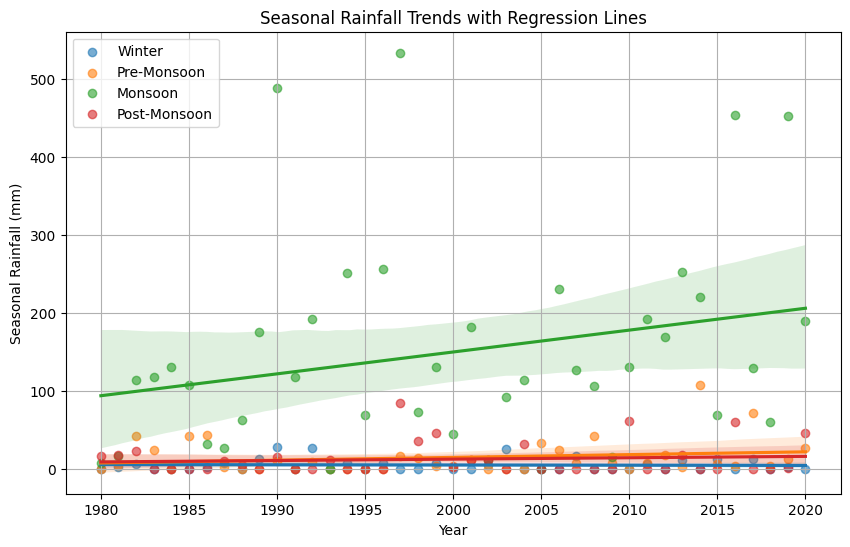

In [22]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "Pali (1).xlsx"
df = pd.read_excel(file_path)


df.columns = df.columns.str.strip().str.lower()


print("Columns in Excel file:", df.columns)


seasons = {
    "Winter": ["jan", "feb"],
    "Pre-Monsoon": ["mar", "apr", "may"],
    "Monsoon": ["jun", "jul", "aug", "sep"],
    "Post-Monsoon": ["oct", "nov", "dec"]
}


for season, season_months in seasons.items():
    valid_months = [m for m in season_months if m in df.columns]
    if valid_months:
        df[season] = df[valid_months].sum(axis=1)
    else:
        print(f"⚠️ Warning: No valid months found for {season}!")


seasonal_results = {}
for season in seasons.keys():
    if season in df.columns:
        test_result = mk.original_test(df[season])
        seasonal_results[season] = {
            "Z-Value": test_result.z,
            "P-Value": test_result.p,
            "Trend": test_result.trend
        }


seasonal_results_df = pd.DataFrame(seasonal_results).T
print(seasonal_results_df)


seasonal_results_df.to_excel("Seasonal_Rainfall_Trend.xlsx")
print("✅ Seasonal rainfall trends saved to 'Seasonal_Rainfall_Trend.xlsx'")


plt.figure(figsize=(10, 6))
for season in seasons.keys():
    if season in df.columns:
        sns.regplot(x=df['year'], y=df[season], scatter_kws={"alpha": 0.6}, label=season)

plt.xlabel("Year")
plt.ylabel("Seasonal Rainfall (mm)")
plt.title("Seasonal Rainfall Trends with Regression Lines")
plt.legend()
plt.grid(True)
plt.show()


Columns in Excel file: Index(['year', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug',
       'sept', 'oct', 'nov', 'dec'],
      dtype='object')
                  Z-Value   P-Value       Trend
jan             -0.350758   0.72577    no trend
feb              0.140147  0.888544    no trend
mar                1.8425  0.065402    no trend
april             0.10666  0.915058    no trend
may              0.717564  0.473026    no trend
june             0.864968  0.387056    no trend
july             0.505437  0.613252    no trend
aug              1.898437  0.057639    no trend
sept             1.112851  0.265772    no trend
oct              0.867382  0.385733    no trend
nov             -0.477218  0.633207    no trend
dec             -1.052311  0.292657    no trend
Winter          -0.161369  0.871803    no trend
Pre-Monsoon      1.348682  0.177439    no trend
Monsoon          1.898437  0.057639    no trend
Post-Monsoon    -0.195925  0.844669    no trend
Yearly_Rainfall  2.235156  

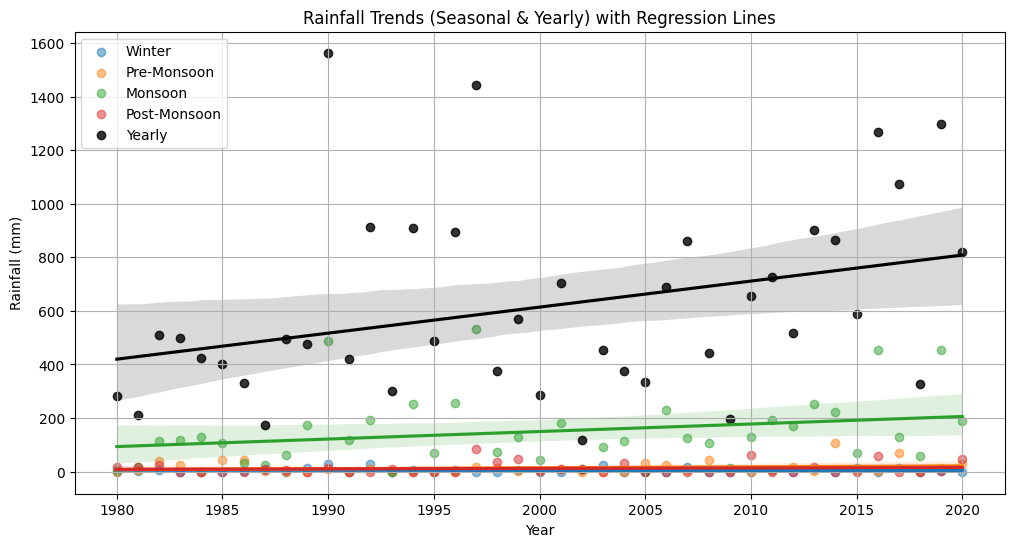

In [23]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "Pali (1).xlsx"
df = pd.read_excel(file_path)


df.columns = df.columns.str.strip().str.lower()


print("Columns in Excel file:", df.columns)


seasons = {
    "Winter": ["jan", "feb"],
    "Pre-Monsoon": ["mar", "apr", "may"],
    "Monsoon": ["jun", "jul", "aug", "sep"],
    "Post-Monsoon": ["oct", "nov", "dec"]
}


for season, season_months in seasons.items():
    valid_months = [m for m in season_months if m in df.columns]
    if valid_months:
        df[season] = df[valid_months].sum(axis=1)
    else:
        print(f"⚠️ Warning: No valid months found for {season}!")

df["Yearly_Rainfall"] = df[df.columns[1:]].sum(axis=1)


trend_results = {}

for column in df.columns[1:]:
    test_result = mk.original_test(df[column])
    trend_results[column] = {
        "Z-Value": test_result.z,
        "P-Value": test_result.p,
        "Trend": test_result.trend
    }


trend_results_df = pd.DataFrame(trend_results).T
print(trend_results_df)


trend_results_df.to_excel("Rainfall_Trend_Analysis.xlsx")
print("✅ Rainfall trend analysis saved to 'Rainfall_Trend_Analysis.xlsx'")


plt.figure(figsize=(12, 6))
for col in seasons.keys():
    if col in df.columns:
        sns.regplot(x=df["year"], y=df[col], scatter_kws={"alpha": 0.5}, label=col)

sns.regplot(x=df["year"], y=df["Yearly_Rainfall"], scatter_kws={"color": "black"}, line_kws={"color": "black"}, label="Yearly")

plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall Trends (Seasonal & Yearly) with Regression Lines")
plt.legend()
plt.grid(True)
plt.show()


Columns in Excel file: Index(['year', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug',
       'sept', 'oct', 'nov', 'dec'],
      dtype='object')
                  Z-Value   P-Value       Trend X-Trend (Sen's Slope)
jan             -0.350758   0.72577    no trend                   0.0
feb              0.140147  0.888544    no trend                   0.0
mar                1.8425  0.065402    no trend                   0.0
april             0.10666  0.915058    no trend                   0.0
may              0.717564  0.473026    no trend                   0.0
june             0.864968  0.387056    no trend                   3.7
july             0.505437  0.613252    no trend                  15.7
aug              1.898437  0.057639    no trend                  39.0
sept             1.112851  0.265772    no trend                   5.0
oct              0.867382  0.385733    no trend                   0.0
nov             -0.477218  0.633207    no trend                   0.0
dec

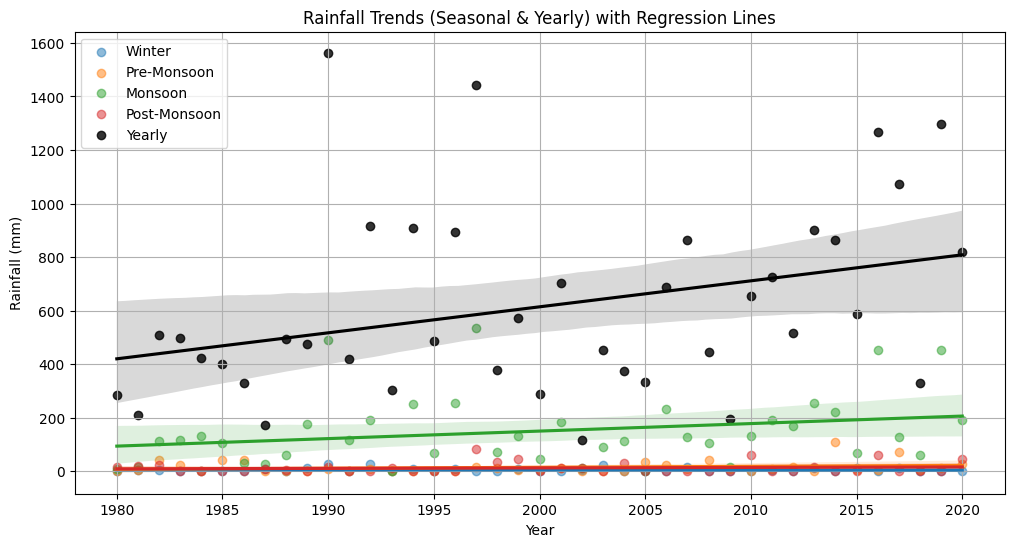

In [24]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


file_path = "Pali (1).xlsx"
df = pd.read_excel(file_path)


df.columns = df.columns.str.strip().str.lower()


print("Columns in Excel file:", df.columns)


seasons = {
    "Winter": ["jan", "feb"],
    "Pre-Monsoon": ["mar", "apr", "may"],
    "Monsoon": ["jun", "jul", "aug", "sep"],
    "Post-Monsoon": ["oct", "nov", "dec"]
}


for season, season_months in seasons.items():
    valid_months = [m for m in season_months if m in df.columns]
    if valid_months:
        df[season] = df[valid_months].sum(axis=1)
    else:
        print(f"⚠️ Warning: No valid months found for {season}!")

df["Yearly_Rainfall"] = df[df.columns[1:]].sum(axis=1)


trend_results = {}

for column in df.columns[1:]:
    test_result = mk.original_test(df[column])
    sen_slope = np.median([df[column][j] - df[column][i] for i in range(len(df[column])) for j in range(i + 1, len(df[column]))])

    trend_results[column] = {
        "Z-Value": test_result.z,
        "P-Value": test_result.p,
        "Trend": test_result.trend,
        "X-Trend (Sen's Slope)": sen_slope
    }


trend_results_df = pd.DataFrame(trend_results).T
print(trend_results_df)


trend_results_df.to_excel("Rainfall_Trend_Analysis.xlsx")
print("✅ Rainfall trend analysis saved to 'Rainfall_Trend_Analysis.xlsx'")


plt.figure(figsize=(12, 6))
for col in seasons.keys():
    if col in df.columns:
        sns.regplot(x=df["year"], y=df[col], scatter_kws={"alpha": 0.5}, label=col)

sns.regplot(x=df["year"], y=df["Yearly_Rainfall"], scatter_kws={"color": "black"}, line_kws={"color": "black"}, label="Yearly")

plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall Trends (Seasonal & Yearly) with Regression Lines")
plt.legend()
plt.grid(True)
plt.show()


Columns in Excel file: Index(['year', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug',
       'sept', 'oct', 'nov', 'dec'],
      dtype='object')
                  Z-Value   P-Value       Trend X-Trend (Sen's Slope)
jan             -0.350758   0.72577    no trend                   0.0
feb              0.140147  0.888544    no trend                   0.0
mar                1.8425  0.065402    no trend                   0.0
april             0.10666  0.915058    no trend                   0.0
may              0.717564  0.473026    no trend                   0.0
june             0.864968  0.387056    no trend              0.315038
july             0.505437  0.613252    no trend                   1.0
aug              1.898437  0.057639    no trend              2.829167
sept             1.112851  0.265772    no trend                0.4088
oct              0.867382  0.385733    no trend                   0.0
nov             -0.477218  0.633207    no trend                   0.0
dec

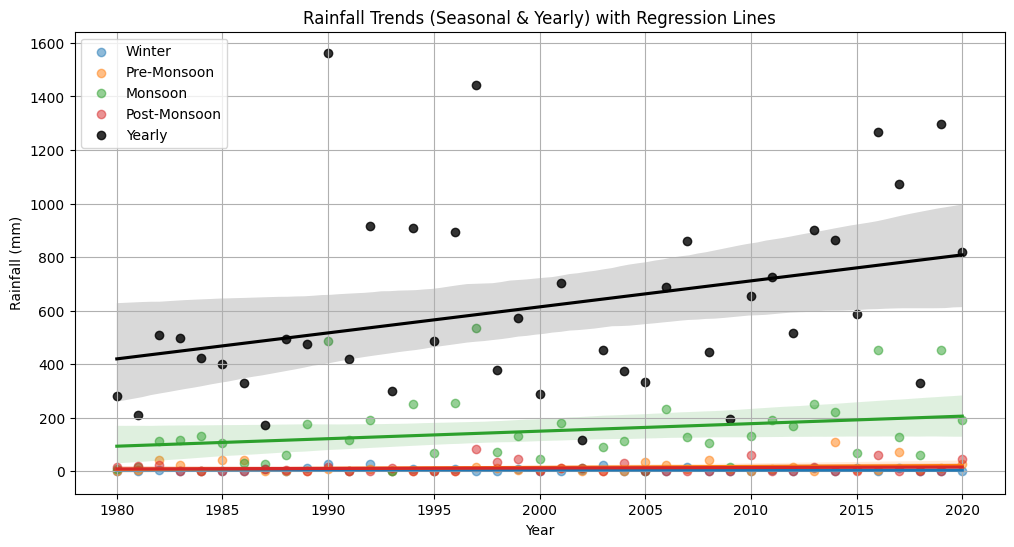

In [25]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


file_path = "Pali (1).xlsx"
df = pd.read_excel(file_path)


df.columns = df.columns.str.strip().str.lower()


print("Columns in Excel file:", df.columns)


seasons = {
    "Winter": ["jan", "feb"],
    "Pre-Monsoon": ["mar", "apr", "may"],
    "Monsoon": ["jun", "jul", "aug", "sep"],
    "Post-Monsoon": ["oct", "nov", "dec"]
}


for season, season_months in seasons.items():
    valid_months = [m for m in season_months if m in df.columns]
    if valid_months:
        df[season] = df[valid_months].sum(axis=1)
    else:
        print(f"⚠️ Warning: No valid months found for {season}!")

df["Yearly_Rainfall"] = df[df.columns[1:]].sum(axis=1)


trend_results = {}

for column in df.columns[1:]:
    test_result = mk.original_test(df[column])


    valid_values = df[column].dropna().values
    slopes = [(valid_values[j] - valid_values[i]) / (j - i) for i in range(len(valid_values)) for j in range(i + 1, len(valid_values))]
    sen_slope = np.median(slopes) if slopes else 0

    trend_results[column] = {
        "Z-Value": test_result.z,
        "P-Value": test_result.p,
        "Trend": test_result.trend,
        "X-Trend (Sen's Slope)": sen_slope
    }


trend_results_df = pd.DataFrame(trend_results).T
print(trend_results_df)


trend_results_df.to_excel("Rainfall_Trend_Analysis.xlsx")
print("✅ Rainfall trend analysis saved to 'Rainfall_Trend_Analysis.xlsx'")


plt.figure(figsize=(12, 6))
for col in seasons.keys():
    if col in df.columns:
        sns.regplot(x=df["year"], y=df[col], scatter_kws={"alpha": 0.5}, label=col)

sns.regplot(x=df["year"], y=df["Yearly_Rainfall"], scatter_kws={"color": "black"}, line_kws={"color": "black"}, label="Yearly")

plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall Trends (Seasonal & Yearly) with Regression Lines")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-26-1fbcbfa34329>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=z_df["Month"], y=z_df["Z-Value"], palette="coolwarm")


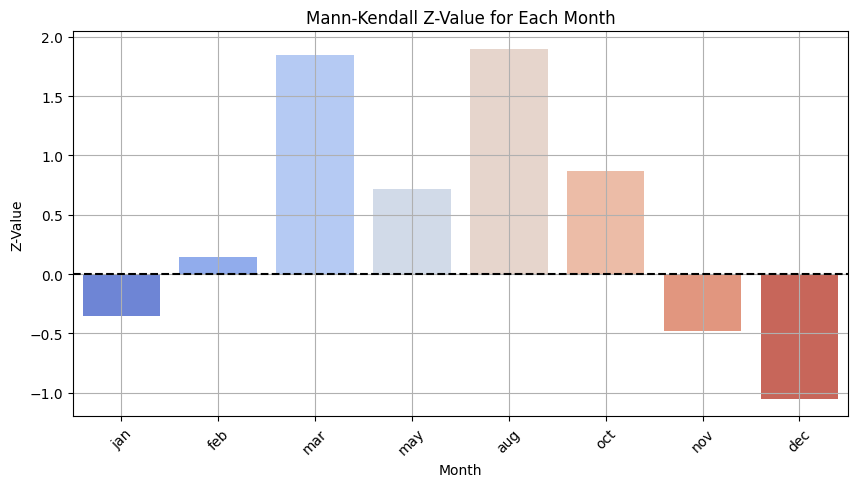

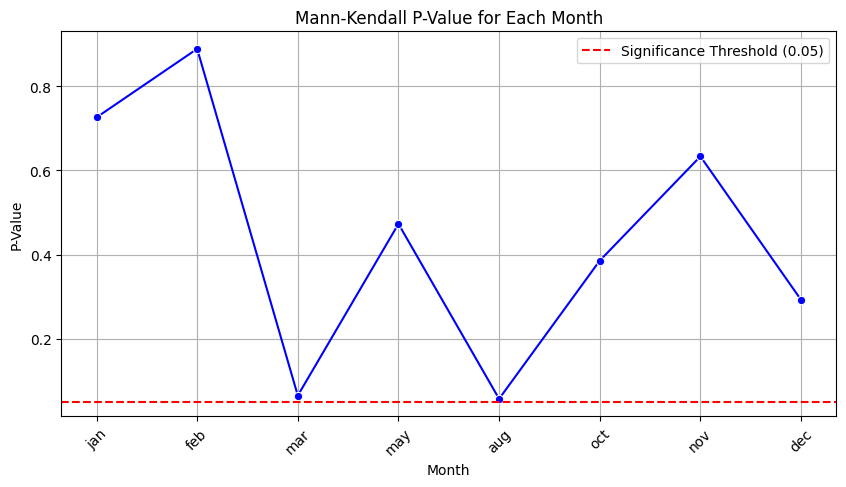

In [26]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


file_path = "Pali (1).xlsx"
df = pd.read_excel(file_path)


df.columns = df.columns.str.strip().str.lower()


months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]


z_values, p_values = {}, {}

for month in months:
    if month in df.columns:
        test_result = mk.original_test(df[month])
        z_values[month] = test_result.z
        p_values[month] = test_result.p


z_df = pd.DataFrame(list(z_values.items()), columns=["Month", "Z-Value"])
p_df = pd.DataFrame(list(p_values.items()), columns=["Month", "P-Value"])


plt.figure(figsize=(10, 5))
sns.barplot(x=z_df["Month"], y=z_df["Z-Value"], palette="coolwarm")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Month")
plt.ylabel("Z-Value")
plt.title("Mann-Kendall Z-Value for Each Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x=p_df["Month"], y=p_df["P-Value"], marker="o", color="blue")
plt.axhline(y=0.05, color="red", linestyle="--", label="Significance Threshold (0.05)")
plt.xlabel("Month")
plt.ylabel("P-Value")
plt.title("Mann-Kendall P-Value for Each Month")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [13]:
import pandas as pd
import pymannkendall as mk

file_path = "Pali (1).xlsx"
df = pd.read_excel(file_path)

months = df.columns[1:]

results = {}
for month in months:
    data = df[month].dropna().tolist()
    test_result = mk.original_test(data)

       results[month] = {
        "Z-Value": test_result.z,
        "Trend": test_result.trend,
        "p-Value": test_result.p
    }

results_df = pd.DataFrame(results).T
print(results_df)

results_df.to_excel("Mann_Kendall_Results.xlsx")
print("Results saved to 'Mann_Kendall_Results.xlsx'")


IndentationError: unexpected indent (<ipython-input-13-95405dd94860>, line 14)

In [ ]:
import imdlib as imd

ModuleNotFoundError: No module named 'imdlib'

In [ ]:
import imdlib as imd
start_yr = 1980
end_yr = 2020
variable = 'rain'
data = imd.get_data(variable, start_yr,end_yr,fn_format='daywise')


# to csv
lat= 26.17
lon = 73.01
data.to_csv('jodhpur_year1975',lat,lon)

ModuleNotFoundError: No module named 'imdlib'

In [ ]:
import pymannkendall as mk

# Given dataset
data = [
    0, 2.8, 6, 0, 0, 0, 0, 7, 0, 12.8, 0, 0, 23, 0, 7, 0, 7.4, 0, 0, 3,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 12, 0, 12, 0, 2, 0
]

# Applying Mann-Kendall test
result = mk.original_test(data)

# Print results
print("Mann-Kendall Test Results:")
print(f"Trend: {result.trend}")
print(f"S Statistic: {result.s}")
print(f"Z-score: {result.z}")
print(f"p-value: {result.p}")
print(f"Kendall's Tau: {result.Tau}")
print(f"Variance: {result.var_s}")
import io
import pandas as pd
pd.read_csv(io.StringIO('''
0
0
0
0
0
0
1.6
0
0
0
28
0
4.2
0
0
0
0
0
0
4.8
0
0
5
25
0
0
0
16
0
0
0
6
0
4
0
0
0
0
0
0
0
'''), header=None)


In [ ]:
pip install pandas openpyxl pymannkendall


In [ ]:
import pandas as pd
import pymannkendall as mk

# Given dataset
data = [
    0, 2.8, 6, 0, 0, 0, 0, 7, 0, 12.8, 0, 0, 23, 0, 7, 0, 7.4, 0, 0, 3,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 12, 0, 12, 0, 2, 0
]

# Applying Mann-Kendall test
result = mk.original_test(data)

# Create a DataFrame to store results
df = pd.DataFrame({
    "Metric": ["Trend", "S Statistic", "Z-score", "p-value", "Kendall's Tau", "Variance"],
    "Value": [result.trend, result.s, result.z, result.p, result.Tau, result.var_s]
})

# Save to Excel
file_name = "mann_kendall_results.xlsx"
df.to_excel(file_name, index=False)

print(f"Excel file '{file_name}' created successfully!")


In [ ]:
import pymannkendall as mk

# Given rainfall data
data = [
    0, 3.6, 3.5, 0, 0, 0, 0, 9.3, 0, 13.4, 0, 0, 33, 0, 11.4, 5.2, 2.5, 1.8,
    0, 2.6, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4.2, 0, 1.2, 21, 0, 0, 0, 9, 0, 0, 0
]

# Applying Mann-Kendall test
result = mk.original_test(data)

# Extract relevant results
mann_kendall_results = {
    "Trend": result.trend,
    "S Statistic": result.s,
    "Z-score": result.z,
    "p-value": result.p,
    "Kendall's Tau": result.Tau,
    "Variance": result.var_s
}

mann_kendall_results


In [ ]:
pip install scipy numpy


In [ ]:
import numpy as np
from scipy.stats import linregress

# Given rainfall data
data = [
    0, 3.6, 3.5, 0, 0, 0, 0, 9.3, 0, 13.4, 0, 0, 33, 0, 11.4, 5.2, 2.5, 1.8,
    0, 2.6, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4.2, 0, 1.2, 21, 0, 0, 0, 9, 0, 0, 0
]

# Calculate time series indices
n = len(data)
time = np.arange(1, n + 1)

# Compute Sen's Slope using linear regression
slope, intercept, r_value, p_value, std_err = linregress(time, data)

# Print results
print(f"Sen's Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"P-value: {p_value}")
print(f"R-squared: {r_value**2}")


In [ ]:
import pymannkendall as mk

# Given dataset
data = [
    0, 2.8, 6, 0, 0, 0, 0, 7, 0, 12.8, 0, 0, 23, 0, 7, 0, 7.4, 0, 0, 3, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 12, 0, 12, 0, 2, 0
]

# Applying Mann-Kendall test
result = mk.original_test(data)

# Extract z-score and p-value
z_score = result.z
p_value = result.p

z_score, p_value


In [ ]:
import numpy as np
import pymannkendall as mk

# Given dataset
data = [
    0, 2.8, 6, 0, 0, 0, 0, 7, 0, 12.8, 0, 0, 23, 0, 7, 0, 7.4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 12, 0, 12, 0, 2, 0
]

# Applying Mann-Kendall test
result = mk.original_test(data)

# Display the results
print("Mann-Kendall Test Results:")
print(f"Trend: {result.trend}")
print(f"S Statistic: {result.s}")
print(f"p-value: {result.p}")
print(f"Tau: {result.z}")
print(f"Variance: {result.var_s}")


In [ ]:
pip install pymannkendall


In [ ]:
import math
from scipy.stats import norm

def mann_kendall_test(x):
    """
    Perform the Mann-Kendall trend test on a time series.

    Parameters:
        x (list or array): The time series data.

    Returns:
        S (int): Mann-Kendall test statistic.
        var_S (float): Variance of S.
        Z (float): Standardized Z-value.
        p_value (float): Two-tailed p-value.
    """
    n = len(x)
    S = 0

    # Compute S by comparing all pairs (i < j)
    for k in range(n - 1):
        for j in range(k + 1, n):
            if x[j] > x[k]:
                S += 1
            elif x[j] < x[k]:
                S -= 1

    # Count tied groups
    tie_counts = {}
    for value in x:
        tie_counts[value] = tie_counts.get(value, 0) + 1

    # Compute variance of S
    var_S = (n * (n - 1) * (2 * n + 5)) / 18.0
    for count in tie_counts.values():
        if count > 1:
            var_S -= (count * (count - 1) * (2 * count + 5)) / 18.0

    # Compute standardized test statistic Z
    if S > 0:
        Z = (S - 1) / math.sqrt(var_S)
    elif S < 0:
        Z = (S + 1) / math.sqrt(var_S)
    else:
        Z = 0

    # Two-tailed p-value from the normal distribution
    p_value = 2 * (1 - norm.cdf(abs(Z)))

    return S, var_S, Z, p_value

# Rainfall data (40 observations)
rainfall = [
    0
0
0
0
0
0
1.6
0
0
0
28
0
4.2
0
0
0
0
0
0
4.8
0
0
5
25
0
0
0
16
0
0
0
6
0
4
0
0
0
0
0
0
0
]

S, var_S, Z, p_value = mann_kendall_test(rainfall)

print("Mann-Kendall Test Results for Rainfall Data:")
print("--------------------------------------------")
print(f"S (test statistic): {S}")
print(f"Variance of S: {var_S:.2f}")
print(f"Standard Deviation of S: {math.sqrt(var_S):.2f}")
print(f"Z-value: {Z:.2f}")
print(f"p-value: {p_value:.4f}")


In [ ]:
import io
import pandas as pd
pd.read_csv(io.StringIO('''
0
0
0
0
0
0
1.6
0
0
0
28
0
4.2
0
0
0
0
0
0
4.8
0
0
5
25
0
0
0
16
0
0
0
6
0
4
0
0
0
0
0
0
0
'''), header=None)


In [ ]:
import math
from scipy.stats import norm

def mann_kendall_test(x):
    """
    Perform the Mann-Kendall trend test on a time series.

    Parameters:
        x (list or array): The time series data.

    Returns:
        S (int): Mann-Kendall test statistic.
        var_S (float): Variance of S.
        Z (float): Standardized Z-value.
        p_value (float): Two-tailed p-value.
    """
    n = len(x)
    S = 0

    # Compute S by comparing all pairs (i < j)
    for k in range(n - 1):
        for j in range(k + 1, n):
            if x[j] > x[k]:
                S += 1
            elif x[j] < x[k]:
                S -= 1

    # Count tied groups
    tie_counts = {}
    for value in x:
        tie_counts[value] = tie_counts.get(value, 0) + 1

    # Compute variance of S
    var_S = (n * (n - 1) * (2 * n + 5)) / 18.0
    for count in tie_counts.values():
        if count > 1:
            var_S -= (count * (count - 1) * (2 * count + 5)) / 18.0

    # Compute standardized test statistic Z
    if S > 0:
        Z = (S - 1) / math.sqrt(var_S)
    elif S < 0:
        Z = (S + 1) / math.sqrt(var_S)
    else:
        Z = 0

    # Two-tailed p-value from the normal distribution
    p_value = 2 * (1 - norm.cdf(abs(Z)))

    return S, var_S, Z, p_value

# Rainfall data (40 observations)
rainfall = [
    2.1, 8.3, 7, 0, 0, 0, 0, 0,
    7.1, 4.8, 0, 0, 27.8, 2, 0, 0,
    0, 0, 0, 5, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0,
    31, 0, 0, 0, 18, 0, 1, 1
]

S, var_S, Z, p_value = mann_kendall_test(rainfall)

print("Mann-Kendall Test Results for Rainfall Data:")
print("--------------------------------------------")
print(f"S (test statistic): {S}")
print(f"Variance of S: {var_S:.2f}")
print(f"Standard Deviation of S: {math.sqrt(var_S):.2f}")
print(f"Z-value: {Z:.2f}")
print(f"p-value: {p_value:.4f}")


In [ ]:
import math
from scipy.stats import norm

def mann_kendall_test(x):
    """
    Perform the Mann-Kendall trend test on a time series.

    Parameters:
        x (list): The time series data.

    Returns:
        S (int): Mann-Kendall test statistic.
        var_S (float): Variance of S.
        Z (float): Standardized Z-value.
        p_value (float): Two-tailed p-value.
    """
    n = len(x)
    S = 0

    # Compute S by comparing all pairs (i < j)
    for k in range(n - 1):
        for j in range(k + 1, n):
            if x[j] > x[k]:
                S += 1
            elif x[j] < x[k]:
                S -= 1

    # Count ties: create a dictionary to count each unique value
    tie_counts = {}
    for value in x:
        tie_counts[value] = tie_counts.get(value, 0) + 1

    # Compute the variance of S
    var_S = (n * (n - 1) * (2 * n + 5)) / 18.0
    for count in tie_counts.values():
        if count > 1:
            var_S -= (count * (count - 1) * (2 * count + 5)) / 18.0

    # Compute the standardized test statistic Z
    if S > 0:
        Z = (S - 1) / math.sqrt(var_S)
    elif S < 0:
        Z = (S + 1) / math.sqrt(var_S)
    else:
        Z = 0

    # Two-tailed p-value from the normal distribution
    p_value = 2 * (1 - norm.cdf(abs(Z)))

    return S, var_S, Z, p_value

# Rainfall data provided (40 observations)
rainfall = [
    2.1, 8.3, 7, 0, 0, 0, 0, 0,
    7.1, 4.8, 0, 0, 27.8, 2, 0, 0,
    0, 0, 0, 5, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0, 0,
    31, 0, 0, 0, 18, 0, 1, 1
]

S, var_S, Z, p_value = mann_kendall_test(rainfall)

print("Mann-Kendall Test Results for Rainfall Data:")
print("--------------------------------------------")
print(f"S (test statistic): {S}")
print(f"Variance of S: {var_S:.2f}")
print(f"Standard Deviation of S: {math.sqrt(var_S):.2f}")
print(f"Z-value: {Z:.2f}")
print(f"p-value: {p_value:.4f}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each season
seasons = ["Spring", "Summer", "Fall", "Winter"]

# Z-scores for each season
z_scores = [0.6539, 3.104, -1.6214, 0]

# Plot Z-scores
plt.figure(figsize=(8, 5))
bars = plt.bar(seasons, z_scores, color='skyblue', alpha=0.8)

# Add horizontal line at Z = 0 for reference
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# Add labels, title, and grid
plt.xlabel('Seasons')
plt.ylabel('Z-scores')
plt.title('Z-scores for Different Seasons')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate Z-scores on bars
for bar, z in zip(bars, z_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1 * np.sign(bar.get_height()),
             f'{z:.2f}', ha='center', va='bottom' if z >= 0 else 'top', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each season
seasons = ["Spring", "Summer", "Fall", "Winter"]

# Z-scores and p-values
z_scores = [0.6539, 3.104, -1.6214, 0]
p_values = [0.5132, 0.0019, 0.1049, 1.0]

# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar width for better visualization
bar_width = 0.35
x = np.arange(len(seasons))

# Plot Z-scores
bar1 = ax1.bar(x - bar_width/2, z_scores, bar_width, label='Z-scores', color='blue', alpha=0.7)
ax1.set_ylabel('Z-scores', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary axis for p-values
ax2 = ax1.twinx()
bar2 = ax2.bar(x + bar_width/2, p_values, bar_width, label='p-values', color='orange', alpha=0.7)
ax2.set_ylabel('p-values', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add labels and title
plt.xticks(x, seasons)
plt.title('Z-scores and p-values for Different Seasons')
fig.tight_layout()

# Add legend
fig.legend(loc="upper right", bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
seasons = ['Spring', 'Fall', 'Summer', 'Winter']
p_values = [0.5131741531824316, 0.10492295569172772, 0.0019091722364721342, 1.0]
z_values = [0.653903229482525, -1.6214416440990438, 3.104009464335199, 0]

# Create the bar graph
fig, ax1 = plt.subplots(figsize=(8, 6))

# Bar graph for p-values
bar_width = 0.4
x = np.arange(len(seasons))
ax1.bar(x - bar_width / 2, p_values, bar_width, label='P-Values', color='skyblue', alpha=0.8)

# Bar graph for z-values
ax1.bar(x + bar_width / 2, z_values, bar_width, label='Z-Values', color='orange', alpha=0.8)

# Add labels and titles
ax1.set_xlabel('Seasons', fontsize=12)
ax1.set_ylabel('Values', fontsize=12)
ax1.set_title('Seasonal Mann-Kendall Analysis Results', fontsize=14)
ax1.set_xticks(x)
ax1.set_xticklabels(seasons, fontsize=11)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--', alpha=0.7)  # Horizontal line for Z=0
ax1.legend()

# Add trend annotations
trends = ['No Trend', 'No Trend', 'Increasing', 'No Trend']
for i, trend in enumerate(trends):
    ax1.text(x[i], max(p_values[i], z_values[i]) + 0.2, trend, ha='center', fontsize=10, color='purple')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for P-values (as provided)
districts = ["Jaipur", "Dausa", "Jhunjhunu", "Sikar", "Alwar"]
p_values = [0.8662064065863087, 0.19647045178774425, 0.2043665291857466, 0.5820690716517367, 0.8662064065863087]

# Create a figure and axes
plt.figure(figsize=(8, 6))

# Plot a horizontal bar chart (histogram) with P-values on the X-axis and district names on the Y-axis
plt.barh(districts, p_values, color='lightgreen', edgecolor='black')

# Customize the plot
plt.title("Histogram of P-values for Districts (Mann-Kendall Test)", fontsize=14)
plt.xlabel("P-value", fontsize=12)
plt.ylabel("District", fontsize=12)

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Z-values (as provided)
districts = ["Jaipur", "Dausa", "Jhunjhunu", "Sikar", "Alwar"]
z_values = [-0.16847907183113248, 1.2916728840386822, 1.2692090077945313, -0.5503649679816994, 0.1684790718311324]

# Create a figure and axes
plt.figure(figsize=(8, 6))

# Plot a horizontal bar chart (histogram) with Z-values on the X-axis and district names on the Y-axis
plt.barh(districts, z_values, color='skyblue', edgecolor='black')

# Customize the plot
plt.title("Histogram of Z-values for Districts (Mann-Kendall Test)", fontsize=14)
plt.xlabel("Z-value", fontsize=12)
plt.ylabel("District", fontsize=12)

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Mann-Kendall test results
districts = ["Dausa", "Jhunjhunu", "Sikar", "Alwar", "Jaipur"]
z_values = [-0.1685, 1.2917, 1.2692, -0.5504, 0.1685]  # Z-values

# Create a histogram for Z-values
plt.figure(figsize=(10, 6))

# Plotting a histogram where each district's Z-value is on the x-axis
plt.hist(z_values, bins=len(districts), color='blue', edgecolor='black', alpha=0.7)

# Customize the plot
plt.title("Histogram of Z-values for Districts (Mann-Kendall Test)", fontsize=14)
plt.xlabel("Z-value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(np.arange(min(z_values)-0.5, max(z_values)+0.5, 0.5))  # Custom X-axis ticks for better clarity

# Adding district names to the Y-axis labels
plt.yticks(range(len(districts)), districts)

# Show the histogram
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data for Mann-Kendall test results
districts = ["Dausa", "Jhunjhunu", "Sikar", "Alwar", "Jaipur"]
z_values = [-0.1685, 1.2917, 1.2692, -0.5504, 0.1685]  # Z-values
colors = ['blue', 'green', 'orange', 'purple', 'red']  # Unique colors for each district

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(districts, z_values, color=colors, edgecolor="black", alpha=0.8)

# Add a vertical line at Z=0 for reference
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# Add labels and grid
plt.title("District-wise Z-values (Mann-Kendall Test)", fontsize=14)
plt.xlabel("Z-value", fontsize=12)
plt.ylabel("Districts", fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add Z-values as labels on the bars
for index, value in enumerate(z_values):
    plt.text(value, index, f"{value:.2f}", va='center', ha='left' if value > 0 else 'right', fontsize=10)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Mann-Kendall test results
districts = ["Dausa", "Jhunjhunu", "Sikar", "Alwar", "Jaipur"]
p_values = [0.8662, 0.1965, 0.2044, 0.5821, 0.8662]  # P-values
colors = ['blue', 'green', 'orange', 'purple', 'red']  # Colors for districts

# Create a histogram for P-values
plt.figure(figsize=(8, 6))
bins = np.linspace(0, 1, 11)  # Create 10 bins between 0 and 1

for i, (district, p_value, color) in enumerate(zip(districts, p_values, colors)):
    plt.hist([p_value], bins=bins, color=color, alpha=0.7, label=district, edgecolor="black", linewidth=1.2)

# Add labels, legend, and grid
plt.title("Histogram of P-values by Districts", fontsize=14)
plt.xlabel("P-value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Districts", fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(np.linspace(0, 1, 11))  # Ensure bins align with x-ticks
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for Mann-Kendall test results
districts = ["Dausa", "Jhunjhunu", "Sikar", "Alwar", "Jaipur"]
z_values = [-0.1685, 1.2917, 1.2692, -0.5504, 0.1685]  # Z-values
colors = ['blue', 'green', 'orange', 'purple', 'red']  # Colors for districts

# Create a histogram for Z-values
plt.figure(figsize=(8, 6))
bins = np.linspace(-2, 2, 9)  # Create bins between -2 and 2

for i, (district, z_value, color) in enumerate(zip(districts, z_values, colors)):
    plt.hist([z_value], bins=bins, color=color, alpha=0.7, label=district, edgecolor="black", linewidth=1.2)

# Add labels, legend, and grid
plt.title("Histogram of Z-values by Districts", fontsize=14)
plt.xlabel("Z-value", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Districts", fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(np.linspace(-2, 2, 9))  # Ensure bins align with x-ticks
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.tri import Triangulation

# Data for Mann-Kendall test results
districts = ["Dausa", "Jhunjhunu", "Sikar", "Alwar", "Jaipur"]
p_values = [0.8662, 0.1965, 0.2044, 0.5821, 0.8662]  # P-values
z_values = [-0.1685, 1.2917, 1.2692, -0.5504, 0.1685]  # Z-values

# Generate x, y coordinates for tricontour and tripcolor
x = np.array(z_values)
y = np.array(p_values)
z = np.array([1 if p < 0.05 else 0 for p in p_values])  # Trend (1: Significant, 0: Non-significant)

### Tricontour and Tripcolor ###
plt.figure(figsize=(8, 6))
triang = Triangulation(x, y)
plt.tricontourf(triang, z, cmap="coolwarm", alpha=0.7)
plt.tricontour(triang, z, colors="black", linewidths=0.5)
for i, district in enumerate(districts):
    plt.text(x[i], y[i] + 0.02, district, fontsize=10, ha="center", color="darkred")
plt.colorbar(label="Trend (1: Significant, 0: Non-significant)")
plt.title("Tricontour and Tripcolor Plot")
plt.xlabel("Z-value")
plt.ylabel("P-value")
plt.grid(alpha=0.3)
plt.show()

### Violin Plot ###
plt.figure(figsize=(6, 4))
plt.violinplot([p_values, z_values], showmeans=True, showextrema=True, widths=0.5)
plt.xticks([1, 2], ["P-values", "Z-values"])
plt.title("Violin Plot")
plt.grid(alpha=0.3)
plt.show()

### Histplot ###
plt.figure(figsize=(8, 5))
plt.hist(p_values, bins=5, alpha=0.7, label="P-values", color="blue", edgecolor="black")
plt.hist(z_values, bins=5, alpha=0.7, label="Z-values", color="orange", edgecolor="black")
plt.title("Histogram of P-values and Z-values")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Pie Chart ###
plt.figure(figsize=(6, 6))
significant_count = sum([1 for p in p_values if p < 0.05])
non_significant_count = len(p_values) - significant_count
plt.pie([significant_count, non_significant_count], labels=["Significant", "Non-Significant"],
        autopct="%1.1f%%", colors=["green", "red"], startangle=90)
plt.title("Pie Chart of Significance")
plt.show()

### Hexbin Plot ###
plt.figure(figsize=(8, 6))
plt.hexbin(x, y, gridsize=10, cmap="viridis", mincnt=1)
plt.colorbar(label="Density")
plt.title("Hexbin Plot of Z-values vs P-values")
plt.xlabel("Z-value")
plt.ylabel("P-value")
plt.grid(alpha=0.3)
plt.show()

### Quiver Plot ###
u = np.gradient(x)  # Change in Z-values
v = np.gradient(y)  # Change in P-values
plt.figure(figsize=(8, 6))
plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=1, color="blue")
plt.scatter(x, y, color="red", label="Districts", zorder=5)
for i, district in enumerate(districts):
    plt.text(x[i], y[i] + 0.02, district, fontsize=10, ha="center", color="darkred")
plt.title("Quiver Plot (Gradient Visualization)")
plt.xlabel("Z-value")
plt.ylabel("P-value")
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Data for Mann-Kendall test results
districts = ["Dausa", "Jhunjhunu", "Sikar", "Alwar", "Jaipur"]
p_values = [0.8662, 0.1965, 0.2044, 0.5821, 0.8662]  # P-values
z_values = [-0.1685, 1.2917, 1.2692, -0.5504, 0.1685]  # Z-values

# Plot setup
plt.figure(figsize=(10, 6))
plt.scatter(z_values, p_values, color="blue", s=100, edgecolor="black", label="District Data")

# Adding district names as labels
for i, district in enumerate(districts):
    plt.text(z_values[i], p_values[i] + 0.02, district, fontsize=10, ha="center", color="darkred")  # Adjust y-offset as needed

# Plot formatting
plt.axhline(0.05, color="red", linestyle="--", label="Significance Threshold (P=0.05)")
plt.axvline(0, color="green", linestyle="--", label="Neutral Z-value (Z=0)")
plt.title("P-value vs Z-value with District Labels", fontsize=16)
plt.xlabel("Z-value", fontsize=12)
plt.ylabel("P-value", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data: Mann-Kendall test results
data = {
    "District": ["Dausa", "Jhunjhunu", "Sikar", "Alwar", "Jaipur"],
    "P-value": [0.8662, 0.1965, 0.2044, 0.5821, 0.8662],
    "Z-value": [-0.1685, 1.2917, 1.2692, -0.5504, 0.1685]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the plotting style
sns.set_style("whitegrid")

# Bar Plot for P-values
plt.figure(figsize=(10, 6))
sns.barplot(x="District", y="P-value", data=df, palette="Blues_d")
plt.title("P-values for Mann-Kendall Test by District", fontsize=16)
plt.xlabel("District", fontsize=14)
plt.ylabel("P-value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Bar Plot for Z-values
plt.figure(figsize=(10, 6))
sns.barplot(x="District", y="Z-value", data=df, palette="Greens_d")
plt.title("Z-values for Mann-Kendall Test by District", fontsize=16)
plt.xlabel("District", fontsize=14)
plt.ylabel("Z-value", fontsize=14)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Box Plot for P-values and Z-values
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["P-value", "Z-value"]], palette="coolwarm")
plt.title("Box Plot of P-values and Z-values", fontsize=16)
plt.ylabel("Values", fontsize=14)
plt.xticks([0, 1], ["P-value", "Z-value"], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Line Plot for P-values and Z-values
plt.figure(figsize=(10, 6))
plt.plot(df["District"], df["P-value"], marker="o", label="P-value", color="blue")
plt.plot(df["District"], df["Z-value"], marker="o", label="Z-value", color="green")
plt.axhline(0, color="red", linestyle="--", linewidth=1, label="Z-value=0")
plt.title("Line Plot of P-values and Z-values", fontsize=16)
plt.xlabel("District", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Mann-Kendall test results
districts = ["Dausa", "Jhunjhunu", "Sikar", "Alwar", "Jaipur"]
p_values = [0.8662, 0.1965, 0.2044, 0.5821, 0.8662]
z_values = [-0.1685, 1.2917, 1.2692, -0.5504, 0.1685]
trends = ["No Trend"] * 5  # Since all trends are 'No Trend'

# Generate random x, y coordinates for tricontour and tripcolor
np.random.seed(0)
x = np.random.uniform(0, 10, len(districts))
y = np.random.uniform(0, 10, len(districts))
z = z_values  # Use Z-values as the z parameter for contour

# 1. Tricontour plot
plt.figure(figsize=(10, 6))
plt.tricontour(x, y, z, levels=14, cmap="coolwarm")
plt.colorbar(label="Z-value")
plt.title("Tricontour Plot for Z-values", fontsize=16)
plt.scatter(x, y, c="black", label="Districts")
for i, txt in enumerate(districts):
    plt.text(x[i], y[i], txt, fontsize=10, ha="right")
plt.xlabel("X-coordinate", fontsize=12)
plt.ylabel("Y-coordinate", fontsize=12)
plt.legend()
plt.show()

# 2. Tripcolor plot
plt.figure(figsize=(10, 6))
plt.tripcolor(x, y, z, cmap="viridis")
plt.colorbar(label="Z-value")
plt.title("Tripcolor Plot for Z-values", fontsize=16)
plt.scatter(x, y, color="white", edgecolor="black")
plt.xlabel("X-coordinate", fontsize=12)
plt.ylabel("Y-coordinate", fontsize=12)
plt.show()

# 3. Violin plot for P-values and Z-values
plt.figure(figsize=(8, 6))
sns.violinplot(data=[p_values, z_values], palette="muted")
plt.xticks([0, 1], ["P-value", "Z-value"])
plt.title("Violin Plot for P-values and Z-values", fontsize=16)
plt.ylabel("Values", fontsize=12)
plt.show()

# 4. Histogram plot for P-values and Z-values
plt.figure(figsize=(8, 6))
plt.hist(p_values, bins=5, alpha=0.7, label="P-values", color="blue")
plt.hist(z_values, bins=5, alpha=0.7, label="Z-values", color="green")
plt.title("Histogram of P-values and Z-values", fontsize=16)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()

# 5. Pie chart for trends
trend_counts = {trend: trends.count(trend) for trend in set(trends)}
plt.figure(figsize=(8, 6))
plt.pie(trend_counts.values(), labels=trend_counts.keys(), autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Pie Chart for Trends", fontsize=16)
plt.show()

# 6. Hexbin plot for X, Y, and Z-values
plt.figure(figsize=(8, 6))
plt.hexbin(x, y, C=z, gridsize=30, cmap="coolwarm")
plt.colorbar(label="Z-value")
plt.title("Hexbin Plot for Z-values", fontsize=16)
plt.xlabel("X-coordinate", fontsize=12)
plt.ylabel("Y-coordinate", fontsize=12)
plt.show()

# 7. Quiver plot (visualizing gradients or directions)
u = [0.2 * z_val for z_val in z_values]  # Mock directional values
v = [0.3 * z_val for z_val in z_values]
plt.figure(figsize=(8, 6))
plt.quiver(x, y, u, v, angles="xy", scale_units="xy", scale=1, color="blue")
plt.title("Quiver Plot for Directions based on Z-values", fontsize=16)
plt.xlabel("X-coordinate", fontsize=12)
plt.ylabel("Y-coordinate", fontsize=12)
plt.quiverkey(plt.gca(), 0.9, 0.9, 1, "Scale = 1", labelpos="E")
plt.scatter(x, y, color="red", label="Districts")
plt.legend()
plt.show()


In [ ]:
pip install imdlib

In [ ]:
    pip install dash plotly pandas numpy statsmodels

In [ ]:
pip install pymannkendall pandas matplotlib seaborn plotly geopandas numpy


In [ ]:
!pip install pymannkendall


In [ ]:
import pandas as pd
import pymannkendall as mk



In [ ]:
import pandas as pd
import pymannkendall as mk

file_path = "/content/Sikar.csv"
data = pd.read_csv(file_path)

print("Dataset Head:\n", data.head())
time_column = 'Dates'
rainfall_column = 'Rainfall'

data = data.sort_values(by=time_column)

if data.isnull().any().sum() > 0:
    print("Warning: Missing values detected. Consider cleaning the data before proceeding.")
else:
    print("No missing values detected.")


rainfall_data = data[rainfall_column].values


result = mk.original_test(rainfall_data)


print("\nMann-Kendall Test Results:")
print(f"Trend: {result.trend}")
print(f"Significance (h): {result.h}")
print(f"P-value: {result.p}")
print(f"Z-Value: {result.z}")


output_file = "/content/MannKendall_Results.csv"
results_dict = {
    "Trend": [result.trend],
    "Significance (h)": [result.h],
    "P-value": [result.p],
    "Z-Value": [result.z]
}
results_df = pd.DataFrame(results_dict)
results_df.to_csv(output_file, index=False)

print(f"\nResults saved to {output_file}")


In [ ]:
# Import necessary libraries
import pandas as pd
import pymannkendall as mk

# Load the CSV file
file_path = "/content/Jhunjhunu.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:\n", data.head())

# Adjust the column names based on your file
time_column = 'Dates'  # Correct column name for the year
rainfall_column = 'Rainfall'  # Correct column name for rainfall

# Ensure data is sorted by time (Dates)
data = data.sort_values(by=time_column)

# Check for missing values
if data.isnull().any().sum() > 0:
    print("Warning: Missing values detected. Consider cleaning the data before proceeding.")
else:
    print("No missing values detected.")

# Extract rainfall data for analysis
rainfall_data = data[rainfall_column].values

# Perform the Mann-Kendall Trend Test
result = mk.original_test(rainfall_data)

# Display results
print("\nMann-Kendall Test Results:")
print(f"Trend: {result.trend}")
print(f"Significance (h): {result.h}")
print(f"P-value: {result.p}")
print(f"Z-Value: {result.z}")

# Optional: Save the results to a new CSV file
output_file = "/content/Jhunjhunu_MannKendall_Results.csv"
results_dict = {
    "Trend": [result.trend],
    "Significance (h)": [result.h],
    "P-value": [result.p],
    "Z-Value": [result.z]
}
results_df = pd.DataFrame(results_dict)
results_df.to_csv(output_file, index=False)

print(f"\nResults saved to {output_file}")


In [ ]:
# Import necessary libraries
import pandas as pd
import pymannkendall as mk

# Load the CSV file
file_path = "/content/Sikar.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:\n", data.head())

# Adjust the column names based on your file
time_column = 'Dates'  # Correct column name for the year
rainfall_column = 'Rainfall'  # Correct column name for rainfall

# Ensure data is sorted by time (Dates)
data = data.sort_values(by=time_column)

# Check for missing values
if data.isnull().any().sum() > 0:
    print("Warning: Missing values detected. Consider cleaning the data before proceeding.")
else:
    print("No missing values detected.")

# Extract rainfall data for analysis
rainfall_data = data[rainfall_column].values

# Perform the Mann-Kendall Trend Test
result = mk.original_test(rainfall_data)

# Display results
print("\nMann-Kendall Test Results:")
print(f"Trend: {result.trend}")
print(f"Significance (h): {result.h}")
print(f"P-value: {result.p}")
print(f"Z-Value: {result.z}")

# Optional: Save the results to a new CSV file
output_file = "/content/Sikar_MannKendall_Results.csv"
results_dict = {
    "Trend": [result.trend],
    "Significance (h)": [result.h],
    "P-value": [result.p],
    "Z-Value": [result.z]
}
results_df = pd.DataFrame(results_dict)
results_df.to_csv(output_file, index=False)

print(f"\nResults saved to {output_file}")


In [ ]:
# Import necessary libraries
import pandas as pd
import pymannkendall as mk

# Load the CSV file
file_path = "/content/Dausa.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:\n", data.head())

# Adjust the column names based on your file
time_column = 'Dates'  # Correct column name for the year
rainfall_column = 'Rainfall'  # Correct column name for rainfall

# Ensure data is sorted by time (Dates)
data = data.sort_values(by=time_column)

# Check for missing values
if data.isnull().any().sum() > 0:
    print("Warning: Missing values detected. Consider cleaning the data before proceeding.")
else:
    print("No missing values detected.")

# Extract rainfall data for analysis
rainfall_data = data[rainfall_column].values

# Perform the Mann-Kendall Trend Test
result = mk.original_test(rainfall_data)

# Display results
print("\nMann-Kendall Test Results:")
print(f"Trend: {result.trend}")
print(f"Significance (h): {result.h}")
print(f"P-value: {result.p}")
print(f"Z-Value: {result.z}")

# Optional: Save the results to a new CSV file
output_file = "/content/Dausa_MannKendall_Results.csv"
results_dict = {
    "Trend": [result.trend],
    "Significance (h)": [result.h],
    "P-value": [result.p],
    "Z-Value": [result.z]
}
results_df = pd.DataFrame(results_dict)
results_df.to_csv(output_file, index=False)

print(f"\nResults saved to {output_file}")


In [ ]:
# Import necessary libraries
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt

# Step 1: Load the five CSV files (adjust file paths accordingly)
districts = ["/content/Alwar.csv", "/content/Dausa.csv", "/content/Jaipur .csv", "/content/Sikar.csv", "/content/Jhunjhunu.csv"]
district_names = ['Alwar', 'Dausa', 'Jaipur', 'Sikar', 'Jhunjhunu']

# Create a list to store Mann-Kendall results
mann_kendall_results = []

# Step 2: Process each district's data and apply Mann-Kendall test
for district_file, district_name in zip(districts, district_names):
    # Load the dataset
    data = pd.read_csv(district_file)
    print(f"Processing {district_name}...")

    # Adjust these column names based on your dataset
    time_column = 'Dates'  # Adjust if your date column has a different name
    rainfall_column = 'Rainfall'  # Adjust if your rainfall column has a different name

    # Ensure columns exist
    if time_column not in data.columns or rainfall_column not in data.columns:
        print(f"Error: Required columns not found in {district_name}. Skipping.")
        continue

    # Sort data by time (Dates)
    data = data.sort_values(by=time_column)

    # Extract rainfall data
    rainfall_data = data[rainfall_column].values

    # Perform the Mann-Kendall Trend Test
    result = mk.original_test(rainfall_data)

    # Store the result for each district
    mann_kendall_results.append({
        'District': district_name,
        'Trend': result.trend,
        'Significance (h)': result.h,
        'P-value': result.p,
        'Z-Value': result.z
    })

# Step 3: Convert results to a DataFrame
results_df = pd.DataFrame(mann_kendall_results)

# Display the results
print("\nMann-Kendall Test Results for All Districts:")
print(results_df)

# Step 4: Plot the trend, h-value, p-value, and z-value for each district
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the trend
axes[0, 0].bar(results_df['District'], results_df['Trend'], color=['green' if x == 1 else 'red' if x == -1 else 'gray' for x in results_df['Trend']])
axes[0, 0].set_title('Trend (Increasing/Decreasing/No Trend)')
axes[0, 0].set_ylabel('Trend')
axes[0, 0].set_xticklabels(results_df['District'], rotation=45)

# Plot the significance (h-value)
axes[0, 1].bar(results_df['District'], results_df['Significance (h)'], color=['blue' if x == 1 else 'orange' for x in results_df['Significance (h)']])
axes[0, 1].set_title('Statistical Significance (h-value)')
axes[0, 1].set_ylabel('Significance (h)')
axes[0, 1].set_xticklabels(results_df['District'], rotation=45)

# Plot the p-value
axes[1, 0].bar(results_df['District'], results_df['P-value'], color='purple')
axes[1, 0].set_title('P-value')
axes[1, 0].set_ylabel('P-value')
axes[1, 0].set_xticklabels(results_df['District'], rotation=45)

# Plot the z-value
axes[1, 1].bar(results_df['District'], results_df['Z-Value'], color='brown')
axes[1, 1].set_title('Z-value')
axes[1, 1].set_ylabel('Z-value')
axes[1, 1].set_xticklabels(results_df['District'], rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# Step 5: Optionally, save the results to a CSV file
results_df.to_csv('/content/MannKendall_Combined_Results.csv', index=False)
print("\nResults saved to /content/MannKendall_Combined_Results.csv")


In [ ]:
# Import necessary libraries
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt

# Step 1: Load the five CSV files (adjust file paths accordingly)
districts = ["/content/Alwar.csv", "/content/Dausa.csv", "/content/Jaipur .csv", "/content/Sikar.csv", "/content/Jhunjhunu.csv"]
district_names = ['Alwar', 'Dausa', 'Jaipur', 'Sikar', 'Jhunjhunu']

# Create a list to store Mann-Kendall results
mann_kendall_results = []

# Step 2: Process each district's data and apply Mann-Kendall test
for district_file, district_name in zip(districts, district_names):
    # Load the dataset
    data = pd.read_csv(district_file)
    print(f"Processing {district_name}...")

    # Adjust these column names based on your dataset
    time_column = 'Dates'  # Adjust if your date column has a different name
    rainfall_column = 'Rainfall'  # Adjust if your rainfall column has a different name

    # Ensure columns exist
    if time_column not in data.columns or rainfall_column not in data.columns:
        print(f"Error: Required columns not found in {district_name}. Skipping.")
        continue

    # Sort data by time (Dates)
    data = data.sort_values(by=time_column)

    # Extract rainfall data
    rainfall_data = data[rainfall_column].values

    # Perform the Mann-Kendall Trend Test
    result = mk.original_test(rainfall_data)

    # Store the result for each district
    mann_kendall_results.append({
        'District': district_name,
        'Trend': result.trend,
        'Significance (h)': result.h,
        'P-value': result.p,
        'Z-Value': result.z
    })

# Step 3: Convert results to a DataFrame
results_df = pd.DataFrame(mann_kendall_results)

# Display the results
print("\nMann-Kendall Test Results for All Districts:")
print(results_df)

# Step 4: Plot the trends for each district
plt.figure(figsize=(10, 6))

# Map Trend to colors (0 = No Trend, 1 = Increasing, -1 = Decreasing)
trend_values = results_df['Trend'].map({0: 'No Trend', 1: 'Increasing', -1: 'Decreasing'})

# Create a bar plot for the trend of each district
plt.bar(results_df['District'], results_df['Trend'], color=['gray' if x == 0 else 'green' if x == 1 else 'red' for x in results_df['Trend']])

# Adding labels and title
plt.xlabel('Districts')
plt.ylabel('Trend')
plt.title('Mann-Kendall Trend Test Results for Rainfall (Five Districts)')
plt.xticks(rotation=45)
plt.yticks([-1, 0, 1], ['Decreasing', 'No Trend', 'Increasing'])
plt.tight_layout()

# Show the plot
plt.show()

# Step 5: Optionally, save the results to a CSV file
results_df.to_csv('/content/MannKendall_Combined_Results.csv', index=False)
print("\nResults saved to /content/MannKendall_Combined_Results.csv")


In [ ]:
pip install pymannkendall pandas matplotlib


In [ ]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt

# Load your CSV file
file_path = "/content/Alwar.csv"  # Replace this with the actual path of your CSV
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to check the structure
print("Dataset Head:")
print(data.head())

# Assuming your data has 'Dates' (years) and 'Rainfall' columns
# Ensure the data is sorted by 'Dates' column
data = data.sort_values(by='Dates')

# Perform Mann-Kendall test
result = mk.original_test(data['Rainfall'])

# Extract the trend, Z value, and p-value from the result
trend = result.trend
z_value = result.z
p_value = result.p

# Output the result
print("\nMann-Kendall Test Results:")
print(f"Trend: {trend}")  # Trend will be 'increasing' or 'decreasing'
print(f"Z Value: {z_value}")
print(f"P Value: {p_value}")

# Plotting the rainfall data and trend
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Rainfall'], label="Rainfall", color='b')
plt.title(f"Rainfall Trend for {file_path.split('/')[-1].split('.')[0]}")
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')

# Highlight the trend (upward or downward)
if trend == 'increasing':
    plt.text(0.1, 0.9, 'Increasing Trend', transform=plt.gca().transAxes, color='green', fontsize=14)
elif trend == 'decreasing':
    plt.text(0.1, 0.9, 'Decreasing Trend', transform=plt.gca().transAxes, color='red', fontsize=14)

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from scipy import signal
from cycler import cycler

# Line Graph
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.subplot(2, 3, 1)
plt.plot(x, y, label='sin(x)', color='b')
plt.title('Line Graph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Bar Graph
districts = ['Alwar', 'Dausa', 'Jaipur', 'Sikar', 'Jhunjhunu']
rainfall = [451.81, 487.49, 491.77, 692.03, 334.85]

plt.subplot(2, 3, 2)
plt.bar(districts, rainfall, color='orange')
plt.title('Bar Graph')
plt.xlabel('Districts')
plt.ylabel('Rainfall (mm)')

# Stacked Bar Graph
categories = ['Category 1', 'Category 2', 'Category 3']
group1 = [10, 20, 30]
group2 = [20, 15, 25]
group3 = [30, 40, 35]

plt.subplot(2, 3, 3)
plt.bar(categories, group1, label='Group 1', color='r')
plt.bar(categories, group2, bottom=group1, label='Group 2', color='g')
plt.bar(categories, group3, bottom=np.array(group1) + np.array(group2), label='Group 3', color='b')
plt.title('Stacked Bar Graph')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()

# Prop Cycle Property
plt.rc('axes', prop_cycle=cycler('color', ['r', 'g', 'b', 'y', 'c']))

plt.subplot(2, 3, 4)
for i in range(5):
    plt.plot(x, y + i, label=f'Line {i}')
plt.title('Prop Cycle Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Masked Graph
y_masked = np.ma.masked_where(y < 0, y)

plt.subplot(2, 3, 5)
plt.plot(x, y_masked, label='Masked Graph')
plt.title('Masked Graph Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# PSD (Power Spectral Density)
data = np.random.randn(1000)
frequencies, power_density = signal.welch(data)

plt.subplot(2, 3, 6)
plt.semilogy(frequencies, power_density)
plt.title('Power Spectral Density')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Density [V**2/Hz]')

# Adjust layout and show all plots
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from scipy import signal

# Sample data: white noise signal
np.random.seed(0)
data = np.random.randn(1000)

# Calculate PSD
frequencies, power_density = signal.welch(data)

# Plot the PSD
plt.semilogy(frequencies, power_density)
plt.title('Power Spectral Density')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Density [V**2/Hz]')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from scipy import signal
from cycler import cycler

# Line Graph
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.subplot(2, 3, 1)
plt.plot(x, y, label='sin(x)', color='b')
plt.title('Line Graph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Bar Graph
districts = ['Alwar', 'Dausa', 'Jaipur', 'Sikar', 'Jhunjhunu']
rainfall = [451.81, 487.49, 491.77, 692.03, 334.85]

plt.subplot(2, 3, 2)
plt.bar(districts, rainfall, color='orange')
plt.title('Bar Graph')
plt.xlabel('Districts')
plt.ylabel('Rainfall (mm)')

# Stacked Bar Graph
categories = ['Category 1', 'Category 2', 'Category 3']
group1 = [10, 20, 30]
group2 = [20, 15, 25]
group3 = [30, 40, 35]

plt.subplot(2, 3, 3)
plt.bar(categories, group1, label='Group 1', color='r')
plt.bar(categories, group2, bottom=group1, label='Group 2', color='g')
plt.bar(categories, group3, bottom=np.array(group1) + np.array(group2), label='Group 3', color='b')
plt.title('Stacked Bar Graph')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.legend()

# Prop Cycle Property
plt.rc('axes', prop_cycle=cycler('color', ['r', 'g', 'b', 'y', 'c']))

plt.subplot(2, 3, 4)
for i in range(5):
    plt.plot(x, y + i, label=f'Line {i}')
plt.title('Prop Cycle Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Masked Graph
y_masked = np.ma.masked_where(y < 0, y)

plt.subplot(2, 3, 5)
plt.plot(x, y_masked, label='Masked Graph')
plt.title('Masked Graph Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# PSD (Power Spectral Density)
data = np.random.randn(1000)
frequencies, power_density = signal.welch(data)

plt.subplot(2, 3, 6)
plt.semilogy(frequencies, power_density)
plt.title('Power Spectral Density')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Density [V**2/Hz]')

# Adjust layout and show all plots
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt

# Load your CSV file
file_path = "/content/Alwar.csv"  # Replace this with the actual path of your CSV
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to check the structure
print("Dataset Head:")
print(data.head())

# Assuming your data has 'Dates' (years) and 'Rainfall' columns
# Ensure the data is sorted by 'Dates' column
data = data.sort_values(by='Dates')

# Perform Mann-Kendall test
result = mk.original_test(data['Rainfall'])

# Extract the trend, Z value, and p-value from the result
trend = result.trend
z_value = result.z
p_value = result.p

# Output the result
print("\nMann-Kendall Test Results:")
print(f"Trend: {trend}")  # Trend will be 'increasing' or 'decreasing'
print(f"Z Value: {z_value}")
print(f"P Value: {p_value}")

# Plotting the rainfall data and trend
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Rainfall'], label="Rainfall", color='b')
plt.title(f"Rainfall Trend for {file_path.split('/')[-1].split('.')[0]}")
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')

# Highlight the trend (upward or downward)
if trend == 'increasing':
    plt.text(0.1, 0.9, 'Increasing Trend', transform=plt.gca().transAxes, color='green', fontsize=14)
elif trend == 'decreasing':
    plt.text(0.1, 0.9, 'Decreasing Trend', transform=plt.gca().transAxes, color='red', fontsize=14)

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt

# Load your CSV file
file_path = "/content/Alwar.csv"  # Replace this with the actual path of your CSV
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to check the structure
print("Dataset Head:")
print(data.head())

# Assuming your data has 'Dates' (years) and 'Rainfall' columns
# Ensure the data is sorted by 'Dates' column
data = data.sort_values(by='Dates')

# Perform Mann-Kendall test
result = mk.original_test(data['Rainfall'])

# Extract the trend, Z value, and p-value from the result
trend = result.trend
z_value = result.z
p_value = result.p

# Output the result
print("\nMann-Kendall Test Results:")
print(f"Trend: {trend}")  # Trend will be 'increasing' or 'decreasing'
print(f"Z Value: {z_value}")
print(f"P Value: {p_value}")

# Plotting the rainfall data and trend
plt.figure(figsize=(10, 6))
plt.plot(data['Dates'], data['Rainfall'], label="Rainfall", color='b')
plt.title(f"Rainfall Trend for {file_path.split('/')[-1].split('.')[0]}")
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')

# Highlight the trend (upward or downward)
if trend == 'increasing':
    plt.text(0.1, 0.9, 'Increasing Trend', transform=plt.gca().transAxes, color='green', fontsize=14)
elif trend == 'decreasing':
    plt.text(0.1, 0.9, 'Decreasing Trend', transform=plt.gca().transAxes, color='red', fontsize=14)

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import geopandas as gpd

# List of files to process
files = [
    "/content/Jaipur (4).csv",
    "/content/Alwar (1).csv",
    "/content/Dausa (1).csv",
    "/content/Sikar (1).csv",
    "/content/Jhunjhunu (1).csv"
]

# Names corresponding to files
district_names = ['Jaipur', 'Alwar', 'Dausa', 'Sikar', 'Jhunjhunu']

# Set the style for plots
sns.set_style('whitegrid')  # Corrected style

# Function to process each file and return Mann-Kendall results
def process_mann_kendall(file_path):
    data = pd.read_csv(file_path)

    # Ensure the data is sorted by 'Dates'
    data = data.sort_values(by='Dates')

    # Perform Mann-Kendall test
    result = mk.original_test(data['Rainfall'])

    return result

# Function to plot the results for each district
def plot_results(file_path, result, district_name):
    trend = result.trend
    z_value = result.z
    p_value = result.p
    h_value = result.h

    # Line Graph for Rainfall Trend
    data = pd.read_csv(file_path)
    plt.figure(figsize=(10, 6))
    plt.plot(data['Dates'], data['Rainfall'], label="Rainfall", color='blue')
    plt.title(f"Rainfall Trend for {district_name}")
    plt.xlabel('Year')
    plt.ylabel('Rainfall (mm)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Bar Graph for Trend (Increasing/Decreasing/No Trend)
    plt.figure(figsize=(10, 6))
    plt.bar(district_name, 1 if trend == 'increasing' else -1 if trend == 'decreasing' else 0, color='green' if trend == 'increasing' else ('red' if trend == 'decreasing' else 'grey'))
    plt.title(f"Trend for {district_name}")
    plt.ylabel('Trend')
    plt.show()

    # Stacked Bar Graph
    plt.figure(figsize=(10, 6))
    labels = ['Increasing', 'Decreasing', 'No Trend']
    values = [1 if trend == 'increasing' else 0, 1 if trend == 'decreasing' else 0, 1 if trend == 'no trend' else 0]
    plt.bar(labels, values)
    plt.title(f"Stacked Trend for {district_name}")
    plt.ylabel('Trend')
    plt.show()

    # Masked Graph with Prop Cycle Property
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(data['Dates'], data['Rainfall'], label="Rainfall", color='purple')
    ax.set_title(f"Masked Graph with Trend for {district_name}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Rainfall (mm)')
    ax.set_facecolor('lightgrey')
    plt.show()

    # PSD (Power Spectral Density) Plot
    plt.figure(figsize=(10, 6))
    plt.psd(data['Rainfall'], NFFT=256, Fs=2, noverlap=128)
    plt.title(f"Power Spectral Density (PSD) for {district_name}")
    plt.show()

    # Geographical Map (Using Geopandas) -- Placeholder for your geographical data
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world.plot(ax=ax, color='lightgrey', edgecolor='black')
    ax.set_title(f"Geographical Map for {district_name}")
    plt.show()

    # Print Mann-Kendall results: Trend, Z-value, P-value, H-value
    print(f"\nMann-Kendall Results for {district_name}:")
    print(f"Trend: {trend}")
    print(f"Z Value: {z_value}")
    print(f"P Value: {p_value}")
    print(f"H Value: {h_value}")

# Main execution for all districts
for file, district in zip(files, district_names):
    print(f"Processing {district}...")
    result = process_mann_kendall(file)
    plot_results(file, result, district)

# Interactive Plot Example: Plotly
data = pd.read_csv("/content/Jaipur (4).csv")  # Use your district file here
fig = go.Figure(data=[go.Scatter(x=data['Dates'], y=data['Rainfall'], mode='lines+markers', name="Rainfall")])
fig.update_layout(title="Interactive Rainfall Trend for Jaipur",
                  xaxis_title='Year',
                  yaxis_title='Rainfall (mm)',
                  template="plotly_dark")
fig.show()


In [ ]:
import os
print(os.listdir('/content/'))


In [ ]:
data = pd.read_csv(file_path)
print(data.columns)  # Check the column names
print(data.head())   # Preview the first few rows


In [ ]:
data.columns = data.columns.str.strip()  # Remove any leading/trailing spaces from column names


In [ ]:
data['Dates'] = pd.to_datetime(data['Dates'], errors='coerce')  # Convert to datetime format


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file paths and district names
file_paths = [
    '/content/Sikar.csv',
    '/content/Jhunjhunu.csv',
    '/content/Jaipur .csv',
    '/content/Dausa.csv',
    '/content/Alwar.csv'
]

district_names = ['Sikar', 'Jhunjhunu', 'Jaipur', 'Dausa', 'Alwar']

# Set the plot style
sns.set(style="whitegrid")

# Function to load and process data for each district
def load_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()  # Clean column names to remove any extra spaces
    data['Dates'] = pd.to_datetime(data['Dates'], errors='coerce')  # Convert 'Dates' to datetime
    data = data.dropna(subset=['Dates', 'Rainfall'])  # Drop rows where Dates or Rainfall is missing
    return data

# Function to plot the line graph and bar graph for each district
def plot_graphs(file_path, district_name):
    data = load_data(file_path)

    # Line Graph (Rainfall Trend)
    plt.figure(figsize=(10, 6))
    plt.plot(data['Dates'], data['Rainfall'], label="Rainfall", color='purple')
    plt.title(f'Rainfall Trend in {district_name}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Rainfall (mm)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Bar Graph (Rainfall by Year)
    plt.figure(figsize=(10, 6))
    data_grouped = data.groupby(data['Dates'].dt.year)['Rainfall'].sum().reset_index()  # Group by year
    plt.bar(data_grouped['Dates'], data_grouped['Rainfall'], color='skyblue')
    plt.title(f'Annual Rainfall in {district_name}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Rainfall (mm)', fontsize=12)
    plt.show()

# Plot for each district
for file_path, district_name in zip(file_paths, district_names):
    plot_graphs(file_path, district_name)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file paths and district names
file_paths = [
    '/content/Sikar.csv',
    '/content/Jhunjhunu.csv',
    '/content/Jaipur .csv',
    '/content/Dausa.csv',
    '/content/Alwar.csv'
]

district_names = ['Sikar', 'Jhunjhunu', 'Jaipur', 'Dausa', 'Alwar']

# Set the plot style
sns.set(style="whitegrid")

# Function to load and process data for each district
def load_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()  # Clean column names to remove any extra spaces
    data['Dates'] = pd.to_datetime(data['Dates'], errors='coerce')  # Convert 'Dates' to datetime
    data = data.dropna(subset=['Dates', 'Rainfall'])  # Drop rows where Dates or Rainfall is missing
    return data

# Function to plot the graph for yearly rainfall
def plot_yearly_rainfall(file_path, district_name):
    data = load_data(file_path)

    # Group by year and sum the rainfall for each year
    data_grouped = data.groupby(data['Dates'].dt.year)['Rainfall'].sum().reset_index()

    # Plotting the Bar Graph for yearly rainfall
    plt.figure(figsize=(10, 6))
    plt.bar(data_grouped['Dates'], data_grouped['Rainfall'], color='skyblue')

    # Adding title and labels
    plt.title(f'Annual Rainfall for {district_name}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Rainfall (mm)', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

# Plot yearly rainfall for each district
for file_path, district_name in zip(file_paths, district_names):
    plot_yearly_rainfall(file_path, district_name)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file paths and district names
file_paths = [
    '/content/Sikar.csv',
    '/content/Jhunjhunu.csv',
    '/content/Jaipur .csv',
    '/content/Dausa.csv',
    '/content/Alwar.csv'
]

district_names = ['Sikar', 'Jhunjhunu', 'Jaipur', 'Dausa', 'Alwar']

# Set the plot style
sns.set(style="whitegrid")

# Function to load and process data for each district
def load_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()  # Clean column names to remove any extra spaces
    data['Dates'] = pd.to_datetime(data['Dates'], errors='coerce')  # Convert 'Dates' to datetime
    data = data.dropna(subset=['Dates', 'Rainfall'])  # Drop rows where Dates or Rainfall is missing
    return data

# Function to plot the graph for yearly rainfall
def plot_yearly_rainfall(file_path, district_name):
    data = load_data(file_path)

    # Group by year and sum the rainfall for each year
    data_grouped = data.groupby(data['Dates'].dt.year)['Rainfall'].sum().reset_index()

    # Plotting the Bar Graph for yearly rainfall
    plt.figure(figsize=(10, 6))
    plt.bar(data_grouped['Dates'], data_grouped['Rainfall'], color='skyblue')

    # Adding title and labels
    plt.title(f'Annual Rainfall for {district_name}', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Total Rainfall (mm)', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

# Plot yearly rainfall for each district
for file_path, district_name in zip(file_paths, district_names):
    plot_yearly_rainfall(file_path, district_name)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

# Define the file paths and district names
file_paths = [
    '/content/Sikar.csv',
    '/content/Jhunjhunu.csv',
    '/content/Jaipur .csv',
    '/content/Dausa.csv',
    '/content/Alwar.csv'
]

district_names = ['Sikar', 'Jhunjhunu', 'Jaipur', 'Dausa', 'Alwar']

# Function to load and process data for each district
def load_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()  # Clean column names to remove any extra spaces
    data['Dates'] = pd.to_datetime(data['Dates'], errors='coerce')  # Convert 'Dates' to datetime
    data = data.dropna(subset=['Dates', 'Rainfall'])  # Drop rows where Dates or Rainfall is missing
    return data

# Function to plot Power Spectral Density (PSD)
def plot_psd(file_path, district_name):
    data = load_data(file_path)

    # We will consider the 'Rainfall' data and calculate its PSD using the Welch method
    rainfall = data['Rainfall'].values

    # Use the Welch method to compute the PSD
    f, Pxx = welch(rainfall, fs=1, nperseg=256)  # fs=1 because we have yearly data, nperseg is the segment length

    # Plotting the PSD
    plt.figure(figsize=(10, 6))
    plt.semilogy(f, Pxx)  # Plot in log scale for better visibility
    plt.title(f'Power Spectral Density (PSD) for {district_name}', fontsize=16)
    plt.xlabel('Frequency (cycles per year)', fontsize=12)
    plt.ylabel('Power/Frequency [V**2/Hz]', fontsize=12)
    plt.grid(True)
    plt.tight_layout()  # Adjust layout
    plt.show()

# Plot PSD for each district
for file_path, district_name in zip(file_paths, district_names):
    plot_psd(file_path, district_name)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import welch

# Define the file paths and district names
file_paths = [
    '/content/Sikar.csv',
    '/content/Jhunjhunu.csv',
    '/content/Jaipur .csv',
    '/content/Dausa.csv',
    '/content/Alwar.csv'
]

district_names = ['Sikar', 'Jhunjhunu', 'Jaipur', 'Dausa', 'Alwar']

# Function to load and process data for each district
def load_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()  # Clean column names to remove any extra spaces
    data['Dates'] = pd.to_datetime(data['Dates'], errors='coerce')  # Convert 'Dates' to datetime
    data = data.dropna(subset=['Dates', 'Rainfall'])  # Drop rows where Dates or Rainfall is missing
    return data

# Function to plot Power Spectral Density (PSD)
def plot_psd(ax, file_path, district_name):
    data = load_data(file_path)

    # We will consider the 'Rainfall' data and calculate its PSD using the Welch method
    rainfall = data['Rainfall'].values

    # Use the Welch method to compute the PSD
    f, Pxx = welch(rainfall, fs=1, nperseg=256)  # fs=1 because we have yearly data, nperseg is the segment length

    # Plotting the PSD in the respective subplot
    ax.semilogy(f, Pxx)  # Plot in log scale for better visibility
    ax.set_title(f'PSD for {district_name}', fontsize=12)
    ax.set_xlabel('Frequency (cycles per year)', fontsize=10)
    ax.set_ylabel('Power/Frequency [V**2/Hz]', fontsize=10)
    ax.grid(True)

# Create a single figure with subplots for each district
fig, axes = plt.subplots(3, 2, figsize=(14, 10))  # 3 rows and 2 columns
axes = axes.flatten()  # Flatten the 2D axes array for easier iteration

# Plot PSD for each district in a separate subplot
for i, (file_path, district_name) in enumerate(zip(file_paths, district_names)):
    plot_psd(axes[i], file_path, district_name)

# Adjust layout to make it more readable
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths for your CSV files
file_paths = [
    '/content/Sikar.csv',
    '/content/Jhunjhunu.csv',
    '/content/Jaipur .csv',
    '/content/Dausa.csv',
    '/content/Alwar.csv'
]

district_names = ['Sikar', 'Jhunjhunu', 'Jaipur', 'Dausa', 'Alwar']

# Function to load and process data for each district
def load_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()  # Clean column names to remove extra spaces
    data['Dates'] = pd.to_datetime(data['Dates'], errors='coerce')  # Convert 'Dates' to datetime
    data = data.dropna(subset=['Dates', 'Rainfall'])  # Drop rows where Dates or Rainfall is missing
    return data

# Function to plot Annual Rainfall for each district
def plot_annual_rainfall(ax, file_path, district_name):
    data = load_data(file_path)

    # Group the data by year and calculate the sum of rainfall for each year
    data['Year'] = data['Dates'].dt.year
    yearly_rainfall = data.groupby('Year')['Rainfall'].sum()  # Sum of rainfall for each year

    # Plotting the Annual Rainfall
    ax.plot(yearly_rainfall.index, yearly_rainfall.values, label=f'{district_name} Rainfall', marker='o')
    ax.set_title(f'Annual Rainfall for {district_name}', fontsize=12)
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Rainfall (mm)', fontsize=10)
    ax.grid(True)
    ax.legend()

# Create a single figure with subplots for each district
fig, axes = plt.subplots(3, 2, figsize=(14, 10))  # 3 rows and 2 columns
axes = axes.flatten()  # Flatten the 2D axes array for easier iteration

# Plot Annual Rainfall for each district in a separate subplot
for i, (file_path, district_name) in enumerate(zip(file_paths, district_names)):
    plot_annual_rainfall(axes[i], file_path, district_name)

# Adjust layout to make it more readable
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths for your CSV files
file_paths = [
    '/content/Sikar.csv',
    '/content/Jhunjhunu.csv',
    '/content/Jaipur .csv',
    '/content/Dausa.csv',
    '/content/Alwar.csv'
]

district_names = ['Sikar', 'Jhunjhunu', 'Jaipur', 'Dausa', 'Alwar']

# Function to load and process data for each district
def load_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()  # Clean column names to remove extra spaces
    data['Dates'] = pd.to_datetime(data['Dates'], errors='coerce')  # Convert 'Dates' to datetime
    data = data.dropna(subset=['Dates', 'Rainfall'])  # Drop rows where Dates or Rainfall is missing
    return data

# Function to plot Annual Rainfall for each district
def plot_annual_rainfall(file_path, district_name, ax):
    data = load_data(file_path)

    # Extract Year from the 'Dates' column
    data['Year'] = data['Dates'].dt.year

    # Filter data to include only years from 1980 to 2020
    data_filtered = data[(data['Year'] >= 1980) & (data['Year'] <= 2020)]

    # Group the data by Year and calculate the total rainfall for each year
    yearly_rainfall = data_filtered.groupby('Year')['Rainfall'].sum()

    # Plotting the Annual Rainfall
    ax.plot(yearly_rainfall.index, yearly_rainfall.values, label=f'{district_name} Rainfall', marker='o')
    ax.set_title(f'Annual Rainfall for {district_name} (1980-2020)', fontsize=12)
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Rainfall (mm)', fontsize=10)
    ax.grid(True)
    ax.legend()

# Create a single figure with subplots for each district
fig, ax = plt.subplots(figsize=(10, 6))  # One large plot

# Plot Annual Rainfall for each district in the same subplot
for file_path, district_name in zip(file_paths, district_names):
    plot_annual_rainfall(file_path, district_name, ax)

# Adjust layout to make it more readable
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths for your CSV files
file_paths = [
    '/content/Sikar.csv',
    '/content/Jhunjhunu.csv',
    '/content/Jaipur .csv',
    '/content/Dausa.csv',
    '/content/Alwar.csv'
]

district_names = ['Sikar', 'Jhunjhunu', 'Jaipur', 'Dausa', 'Alwar']

# Function to load and process data for each district
def load_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()  # Clean column names to remove extra spaces
    data['Dates'] = pd.to_datetime(data['Dates'], errors='coerce')  # Convert 'Dates' to datetime
    data = data.dropna(subset=['Dates', 'Rainfall'])  # Drop rows where Dates or Rainfall is missing
    return data

# Function to plot Annual Rainfall for each district
def plot_annual_rainfall(file_path, district_name, ax):
    data = load_data(file_path)

    # Extract Year from the 'Dates' column
    data['Year'] = data['Dates'].dt.year

    # Filter data to include only years from 1980 to 2020
    data_filtered = data[(data['Year'] >= 1980) & (data['Year'] <= 2020)]

    if data_filtered.empty:
        print(f"No data available for {district_name} between 1980 and 2020.")
        return

    # Group the data by Year and calculate the total rainfall for each year
    yearly_rainfall = data_filtered.groupby('Year')['Rainfall'].sum()

    # Plotting the Annual Rainfall
    ax.plot(yearly_rainfall.index, yearly_rainfall.values, label=f'{district_name} Rainfall', marker='o')
    ax.set_title(f'Annual Rainfall for {district_name} (1980-2020)', fontsize=12)
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Rainfall (mm)', fontsize=10)
    ax.grid(True)
    ax.legend()

# Create a single figure with subplots for each district
fig, ax = plt.subplots(figsize=(10, 6))  # One large plot

# Plot Annual Rainfall for each district in the same subplot
for file_path, district_name in zip(file_paths, district_names):
    plot_annual_rainfall(file_path, district_name, ax)

# Adjust layout to make it more readable
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk

# Define the file paths for your CSV files
file_paths = [
    '/content/Sikar.csv',
    '/content/Jhunjhunu.csv',
    '/content/Jaipur .csv',
    '/content/Dausa.csv',
    '/content/Alwar.csv'
]

district_names = ['Sikar', 'Jhunjhunu', 'Jaipur', 'Dausa', 'Alwar']

# Function to load and process data for each district
def load_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()  # Clean column names to remove extra spaces
    data['Dates'] = pd.to_datetime(data['Dates'], errors='coerce')  # Convert 'Dates' to datetime
    data = data.dropna(subset=['Dates', 'Rainfall'])  # Drop rows where Dates or Rainfall is missing
    return data

# Function to perform Mann-Kendall test and return the trend results
def mann_kendall_test(data):
    # Mann-Kendall Test on the Rainfall data
    mk_result = mk.original_test(data['Rainfall'])
    return mk_result

# Function to plot Annual Rainfall and Mann-Kendall trend
def plot_annual_rainfall(file_path, district_name, ax):
    data = load_data(file_path)

    # Extract Year from the 'Dates' column
    data['Year'] = data['Dates'].dt.year

    # Filter data to include only years from 1980 to 2020
    data_filtered = data[(data['Year'] >= 1980) & (data['Year'] <= 2020)]

    if data_filtered.empty:
        print(f"No data available for {district_name} between 1980 and 2020.")
        return

    # Group the data by Year and calculate the total rainfall for each year
    yearly_rainfall = data_filtered.groupby('Year')['Rainfall'].sum()

    # Perform Mann-Kendall test
    mk_result = mann_kendall_test(data_filtered)

    # Plotting the Annual Rainfall
    ax.plot(yearly_rainfall.index, yearly_rainfall.values, label=f'{district_name} Rainfall', marker='o')

    # Display Mann-Kendall test result as text on the plot
    trend = "Increasing" if mk_result.trend == 'increasing' else "Decreasing" if mk_result.trend == 'decreasing' else "No Trend"
    ax.text(1990, yearly_rainfall.max()*0.95, f'Mann-Kendall Trend: {trend}\nP-value: {mk_result.p_value:.4f}',
            fontsize=9, color='red', ha='center')

    ax.set_title(f'Annual Rainfall and Mann-Kendall Trend for {district_name} (1980-2020)', fontsize=12)
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Rainfall (mm)', fontsize=10)
    ax.grid(True)
    ax.legend()

# Create a single figure with subplots for each district
fig, ax = plt.subplots(figsize=(10, 6))  # One large plot

# Plot Annual Rainfall for each district in the same subplot
for file_path, district_name in zip(file_paths, district_names):
    plot_annual_rainfall(file_path, district_name, ax)

# Adjust layout to make it more readable
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths for your CSV files
file_paths = [
    '/content/Sikar.csv',
    '/content/Jhunjhunu.csv',
    '/content/Jaipur .csv',
    '/content/Dausa.csv',
    '/content/Alwar.csv'
]

district_names = ['Sikar', 'Jhunjhunu', 'Jaipur', 'Dausa', 'Alwar']

# Function to load and process data for each district
def load_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()  # Clean column names to remove extra spaces
    data['Dates'] = pd.to_datetime(data['Dates'], errors='coerce')  # Convert 'Dates' to datetime
    data = data.dropna(subset=['Dates', 'Rainfall'])  # Drop rows where Dates or Rainfall is missing
    return data

# Function to plot Annual Rainfall for each district
def plot_annual_rainfall(file_path, district_name, ax):
    data = load_data(file_path)

    # Extract Year from the 'Dates' column
    data['Year'] = data['Dates'].dt.year

    # Filter data to include only years from 1980 to 2020
    data_filtered = data[(data['Year'] >= 1980) & (data['Year'] <= 2020)]

    if data_filtered.empty:
        print(f"No data available for {district_name} between 1980 and 2020.")
        return

    # Group the data by Year and calculate the total rainfall for each year
    yearly_rainfall = data_filtered.groupby('Year')['Rainfall'].sum()

    # Plotting the Annual Rainfall
    ax.plot(yearly_rainfall.index, yearly_rainfall.values, label=f'{district_name} Rainfall', marker='o')

    ax.set_title(f'Annual Rainfall for {district_name} (1980-2020)', fontsize=12)
    ax.set_xlabel('Year', fontsize=10)
    ax.set_ylabel('Rainfall (mm)', fontsize=10)
    ax.grid(True)
    ax.legend()

# Create a single figure with subplots for each district
fig, ax = plt.subplots(figsize=(10, 6))  # One large plot

# Plot Annual Rainfall for each district in the same subplot
for file_path, district_name in zip(file_paths, district_names):
    plot_annual_rainfall(file_path, district_name, ax)

# Adjust layout to make it more readable
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths for your CSV files
file_paths = [
    '/content/Sikar.csv',
    '/content/Jhunjhunu.csv',
    '/content/Jaipur .csv',
    '/content/Dausa.csv',
    '/content/Alwar.csv'
]

district_names = ['Sikar', 'Jhunjhunu', 'Jaipur', 'Dausa', 'Alwar']

# Function to load and process data for each district
def process_rainfall_data(file_path):
    data = pd.read_csv(file_path)
    data.columns = data.columns.str.strip()  # Remove extra spaces from column names
    data['Dates'] = pd.to_datetime(data['Dates'], errors='coerce')  # Convert 'Dates' to datetime
    data = data.dropna(subset=['Dates', 'Rainfall'])  # Drop rows with missing Dates or Rainfall
    data['Year'] = data['Dates'].dt.year  # Extract Year from Dates
    return data.groupby('Year')['Rainfall'].sum()  # Group by Year and sum Rainfall

# Initialize a dictionary to store rainfall data
rainfall_data = {}

# Process data for each district and store it in the dictionary
for file_path, district_name in zip(file_paths, district_names):
    rainfall_data[district_name] = process_rainfall_data(file_path)

# Print the yearly rainfall data for each district
for district_name, data in rainfall_data.items():
    print(f"\nYearly Rainfall Data for {district_name}:\n")
    print(data)

# Plotting the rainfall data
plt.figure(figsize=(12, 8))

for district_name, data in rainfall_data.items():
    plt.plot(data.index, data.values, marker='o', label=f'{district_name} Rainfall')

# Adding plot details
plt.title('Yearly Rainfall (1980-2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.xticks(range(1980, 2021, 5), rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Data: District-wise Mann-Kendall results
data = {
    "District": ["Dausa", "Jhunjhunu", "Sikar", "Alwar", "Jaipur"],
    "Trend": ["no trend", "no trend", "no trend", "no trend", "no trend"],
    "Significance": [False, False, False, False, False],
    "P-value": [0.8662, 0.1965, 0.2044, 0.5821, 0.8662],
    "Z-Value": [-0.168, 1.291, 1.269, -0.550, 0.168]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Load district shapefile
# Ensure the shapefile matches your districts
shapefile_path = "/path/to/rajasthan_districts.shp"  # Update with your actual shapefile path
gdf = gpd.read_file(shapefile_path)

# Ensure the shapefile and data align
# The 'District' column in df should match a column in the shapefile
gdf = gdf.merge(df, on="District", how="left")

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
gdf.plot(
    column="P-value",  # Column to visualize
    cmap="coolwarm",   # Colormap for visualization
    legend=True,
    legend_kwds={'label': "P-value"},
    ax=ax,
    edgecolor="black"
)

# Add title and labels
plt.title("Mann-Kendall Test Results for Jaipur Division Districts", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Add district names as labels
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf["District"]):
    ax.text(x, y, label, fontsize=8, ha="center")

# Save and show the map
plt.savefig("/content/MannKendall_Map.png", dpi=300)
plt.show()
